# **dataset 2: Triple MNIST**

## Step-by-Step Guide to Build a CNN for Multi-Label Classification Problems:

### 1. Import Libraries and Function

Begin by importing all the required libraries and functions for data processing, model building, and evaluation.

### 2. Load the Dataset
Load the training, validation, and test datasets from the specified directories.

### 3. Preprocess the Dataset

- Reshape: Adjust the shape of the data to fit the model input requirements.
- Normalize Pixel Values: Scale the pixel values to the range [0, 1].
- Define Number of Categories: Specify the number of categories for each digit position.
- Flatten: Convert multi-dimensional arrays to a single dimension.
- Convert Labels to Categorical: Use one-hot encoding to convert labels for multi-label classification.
- Flatten Label Lists: Convert the label lists to dictionaries for multi-output models.
- Custom Data Generator: Define a custom data generator to yield batches of data during training.

### 4. Define Learning Rate and K-Fold Cross Validation
- Set up a learning rate scheduler to adjust the learning rate during training.
- Use K-fold cross-validation to better estimate model performance.

### 5. Set Up Callbacks for Early Stopping, Model Checkpoint, and TensorBoard
Configure callbacks for early stopping, saving the best model, and logging training progress for visualization in TensorBoard.
Implement early stopping to prevent overfitting by stopping training when the validation loss stops improving.

### 6. Define Function to Plot Learning Curves
Create a function to visualize training and validation accuracy and loss over epochs.

### 7. Define the CNN Model Architecture
Set Up the Input Shape. Build the CNN model architecture.
To be compared:
The last layer/ Output layer uses a sigmoid versus softmax.
The loss function uses categorical crossentropy versus binary crossentropy.

### 8. Train the Model
Train the model using the training data and validate it on the validation data, while using the defined callbacks.

### 9. Evaluate the Model
Evaluate the model and print the accuracy and loss metrics.

### 10. Perform Hyperparameter tuning 
- Perform hyperparameter tuning to identify the best model parameters.
- Apply regularization techniques to prevent overfitting.
- Use cross-validation to obtain a more reliable estimate of the model's performance.

### 11. Re-Evaluate the Model
Re-Evaluate the model after Hyperparameter Tuning.

### 12. Final evaluation on the Test set
After finishing all the training and testing on the validation data, we trained the model one last time on all the training data. Then, we tested it on a completely new set of data that the model had never seen before (the Test set). This final evaluation checks how well the model performs on totally new data, making sure it’s ready for real life.

##  **1. Import necessary libraries and functions.**

In [2]:
!pip install tensorflow
!pip install keras-tuner

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import os
import numpy as np
from PIL import Image
import datetime
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

## **2. Load the Dataset**

In [4]:
def load_images_from_folder(folder, img_size=(28, 28)):
    images = []
    labels = []
    for subdir in os.listdir(folder):
        subdir_path = os.path.join(folder, subdir)
        if os.path.isdir(subdir_path):
            label = [int(digit) for digit in subdir]  # the subdir name is the label
            for filename in os.listdir(subdir_path):
                img_path = os.path.join(subdir_path, filename)
                try:
                    img = Image.open(img_path).convert('L')
                    img = img.resize(img_size)
                    img = np.array(img)
                    img = np.expand_dims(img, axis=-1)  # Add channel dimension
                    images.append(img)
                    labels.append(label)
                except Exception as e:
                    print(f"Failed to process image {img_path}: {e}")
    return np.array(images), np.array(labels)


In [5]:
# Define the directories
train_dir = r'C:\Users\nares\Documents\UHull\Assignments\uhull-module-2\assignment_2\naresh\dataset2\train'
test_dir = r'C:\Users\nares\Documents\UHull\Assignments\uhull-module-2\assignment_2\naresh\dataset2\test'
val_dir = r'C:\Users\nares\Documents\UHull\Assignments\uhull-module-2\assignment_2\naresh\dataset2\val'

print("Train directory contains:", os.listdir(train_dir))
print("Validation directory contains:", os.listdir(val_dir))
print("Test directory contains:", os.listdir(test_dir))

Train directory contains: ['000', '004', '005', '006', '007', '009', '011', '013', '015', '018', '020', '021', '022', '023', '024', '026', '027', '028', '030', '031', '032', '033', '034', '035', '036', '037', '038', '040', '041', '042', '043', '045', '048', '049', '050', '052', '054', '055', '057', '059', '061', '062', '063', '064', '066', '070', '071', '072', '074', '075', '078', '079', '080', '082', '084', '085', '089', '090', '091', '093', '094', '095', '097', '100', '101', '102', '103', '104', '105', '107', '110', '114', '115', '116', '117', '118', '119', '120', '121', '122', '124', '125', '127', '128', '131', '132', '134', '138', '142', '145', '147', '148', '150', '151', '153', '155', '156', '157', '159', '160', '161', '162', '163', '164', '165', '166', '167', '169', '170', '171', '172', '174', '175', '177', '178', '179', '181', '182', '183', '184', '185', '188', '189', '190', '191', '192', '195', '196', '199', '200', '201', '202', '203', '204', '205', '209', '210', '211', '212', 

In [6]:
# Load the datasets
X_train, y_train = load_images_from_folder(train_dir, img_size=(28, 28))
X_val, y_val = load_images_from_folder(val_dir, img_size=(28, 28))
X_test, y_test = load_images_from_folder(test_dir, img_size=(28, 28))

In [7]:
X_train.shape

(64000, 28, 28, 1)

In [8]:
X_train.dtype

dtype('uint8')

In [9]:
X_train.min()

0

In [10]:
X_train.max()

255

In [11]:
#X_train[0]

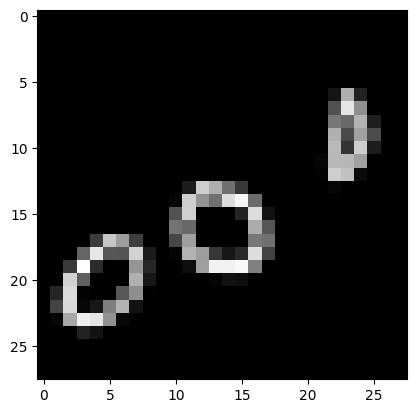

In [12]:
image = X_train[0]
plt.imshow(image, cmap = 'gray')

we can now see that this is a 28x28 pixel image of a 000. The answer is in the y_train data, which contains correct labels for the data

In [13]:
y_train[0]

array([0, 0, 0])

In [14]:
X_test.shape

(20000, 28, 28, 1)

In [15]:
X_val.shape

(16000, 28, 28, 1)

In [16]:
# Print shapes to verify
print(f"X_train shape: {X_train.shape}")
for i in range(3):
    print(f"y_train[{i}] shape: {y_train[i].shape}")
print(f"X_val shape: {X_val.shape}")
for i in range(3):
    print(f"y_val[{i}] shape: {y_val[i].shape}")
print(f"X_test shape: {X_test.shape}")
for i in range(3):
    print(f"y_test[{i}] shape: {y_test[i].shape}")

X_train shape: (64000, 28, 28, 1)
y_train[0] shape: (3,)
y_train[1] shape: (3,)
y_train[2] shape: (3,)
X_val shape: (16000, 28, 28, 1)
y_val[0] shape: (3,)
y_val[1] shape: (3,)
y_val[2] shape: (3,)
X_test shape: (20000, 28, 28, 1)
y_test[0] shape: (3,)
y_test[1] shape: (3,)
y_test[2] shape: (3,)


## **3. Preprocess the Dataset**

In [17]:
#X_train[0]

In [18]:
# Normalize pixel values to scale the pixel values to the range [0, 1].

X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [19]:
# Ensure the images have the correct shape for CNN input
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [20]:
X_train.shape

(64000, 28, 28, 1)

We can now see that the values are all floating between 0.0 and 1.0 after Normalized

In [21]:
X_train.dtype

dtype('float32')

In [22]:
X_train.min()

0.0

In [23]:
X_train.max()

1.0

In [24]:
# Number of categories for each digit position
num_categories = 10

In [25]:
# Convert labels to categorical (one-hot encoding)
y_train = [to_categorical([label[i] for label in y_train], num_categories) for i in range(3)]
y_val = [to_categorical([label[i] for label in y_val], num_categories) for i in range(3)]
y_test = [to_categorical([label[i] for label in y_test], num_categories) for i in range(3)]

In [26]:
# Flatten the label lists to dictionaries
y_train_dict = {f'digit_{i}': y_train[i] for i in range(3)}
y_val_dict = {f'digit_{i}': y_val[i] for i in range(3)}
y_test_dict = {f'digit_{i}': y_test[i] for i in range(3)}

In [27]:
y_train

[array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]])]

In [28]:
# Print shapes to verify
print(f"X_train shape: {X_train.shape}")
for i in range(3):
    print(f"y_train[{i}] shape: {y_train[i].shape}")
print(f"X_val shape: {X_val.shape}")
for i in range(3):
    print(f"y_val[{i}] shape: {y_val[i].shape}")
print(f"X_test shape: {X_test.shape}")
for i in range(3):
    print(f"y_test[{i}] shape: {y_test[i].shape}")

X_train shape: (64000, 28, 28, 1)
y_train[0] shape: (64000, 10)
y_train[1] shape: (64000, 10)
y_train[2] shape: (64000, 10)
X_val shape: (16000, 28, 28, 1)
y_val[0] shape: (16000, 10)
y_val[1] shape: (16000, 10)
y_val[2] shape: (16000, 10)
X_test shape: (20000, 28, 28, 1)
y_test[0] shape: (20000, 10)
y_test[1] shape: (20000, 10)
y_test[2] shape: (20000, 10)


In [29]:
y_train[0:9]

[array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]])]

In [30]:
y_train_dict

{'digit_0': array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 'digit_1': array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 'digit_2': array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]])}

In [31]:
y_val_dict

{'digit_0': array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 'digit_1': array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 'digit_2': array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]])}

In [32]:
# Custom Data Generator

def custom_data_generator(X, y, batch_size):
    while True:
        idx = np.random.permutation(len(X))
        X = X[idx]
        y = {key: y[key][idx] for key in y}
        for i in range(0, len(X), batch_size):
            X_batch = X[i:i + batch_size]
            y_batch = {key: y[key][i:i + batch_size] for key in y}
            yield X_batch, y_batch

## **4. Define Learning Rate and K-Fold Cross Validation**

In [33]:
#Set up learning rate scheduler to adjust the learning rate during training.

def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 10:
        lr *= 0.1
    elif epoch > 20:
        lr *= 0.01
    return lr

In [34]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

lr_scheduler = LearningRateScheduler(lr_schedule)

In [35]:
# K-Fold Cross Validation
kf = KFold(n_splits=2, shuffle=True)

k=2 to save time and resources.  With fewer folds, the training process will be faster because there are fewer iterations.

## **5. Set Up Callbacks for Early Stopping**
Configure callbacks for early stopping, saving the best model, and logging training progress for visualization in TensorBoard. Implement early stopping to prevent overfitting by stopping training when the validation loss stops improving.

In [36]:
# Callback for early stopping with adjusted patience.
# If the validation loss does not improve for 20 consecutive epochs, training will stop early.

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

The early stopping callback is used/ triggered to stop training early if the validation loss does not improve for a certain number of epochs (patience). 

## **6. Define Function to Plot Learning Curves**
Create a function to visualize training and validation accuracy and loss over epochs.

In [37]:
def plot_learning_curves(history):
    acc = [history.history[f'digit_{i}_accuracy'] for i in range(3)]
    val_acc = [history.history[f'val_digit_{i}_accuracy'] for i in range(3)]
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    for i in range(3):
        plt.plot(epochs, acc[i], label=f'Training accuracy digit_{i}')
        plt.plot(epochs, val_acc[i], label=f'Validation accuracy digit_{i}')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

## **7A. Define the CNN Model uses categorical_crossentropy function as the loss function.**
Build the CNN model architecture. 
The last layer/ Output layer uses a sigmoid function for multi-label classificatio
.

#### For multi-label classification, the last layer in the model should uses a sigmoid function for label prediction, and the training process should uses a binary_crossentropy function as the loss function. 
#### But for comparison purpose, we will use loss='categorical_crossentropy' function as the loss function first.

In [38]:
def create_cnn_model_sgcc():
    inputs = Input(shape=(28, 28, 1))  # Input shape for a 28x28 grayscale image
    x = Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.001))(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    x = Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.001))(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    x = Flatten()(x)
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = Dropout(0.5)(x)
    outputs = [Dense(10, activation='sigmoid', name=f'digit_{i}')(x) for i in range(3)]
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(
        loss='categorical_crossentropy',  # usually categorical_crossentropy is for multi-class classification, not for multi-label classification.
        optimizer='adam',
        metrics={f'digit_{i}': 'accuracy' for i in range(3)}
    )
    return model

# Example usage
model = create_cnn_model_sgcc()
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 26, 26,    │        320 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 13, 13,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 13, 13,    │          0 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 11, 11,    │     18,496 │ dropout[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 5, 5, 64)  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 5, 5, 64)  │          0 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 1600)      │          0 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    409,856 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 256)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ digit_0 (Dense)     │ (None, 10)        │      2,570 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ digit_1 (Dense)     │ (None, 10)        │      2,570 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ digit_2 (Dense)     │ (None, 10)        │      2,570 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 436,382 (1.66 MB)

 Trainable params: 436,382 (1.66 MB)

 Non-trainable params: 0 (0.00 B)

## **8A. Train The Model with Sigmoid activation function and 'categorical_crossentropy' as the loss function.**

In [39]:
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold = {key: y_train_dict[key][train_index] for key in y_train_dict}
    y_val_fold = {key: y_train_dict[key][val_index] for key in y_train_dict}

    model = create_cnn_model_sgcc()  # Using CNN model instead of Dense model

    history = model.fit(
        custom_data_generator(X_train_fold, y_train_fold, batch_size=128),
        epochs=20, verbose=1, steps_per_epoch=len(X_train_fold) // 128,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping, lr_scheduler, tensorboard_callback]
    )

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - digit_0_accuracy: 0.1780 - digit_1_accuracy: 0.1878 - digit_2_accuracy: 0.1687 - loss: 6.8287 - val_digit_0_accuracy: 0.6814 - val_digit_1_accuracy: 0.7537 - val_digit_2_accuracy: 0.6164 - val_loss: 3.5770 - learning_rate: 0.0010
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - digit_0_accuracy: 0.6077 - digit_1_accuracy: 0.6477 - digit_2_accuracy: 0.5242 - loss: 3.8476 - val_digit_0_accuracy: 0.8621 - val_digit_1_accuracy: 0.8781 - val_digit_2_accuracy: 0.7969 - val_loss: 2.3167 - learning_rate: 0.0010
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - digit_0_accuracy: 0.7367 - digit_1_accuracy: 0.7551 - digit_2_accuracy: 0.6618 - loss: 2.9940 - val_digit_0_accuracy: 0.8957 - val_digit_1_accuracy: 0.9011 - val_digit_2_accuracy: 0.8514 - val_loss: 1.9074 - learning_rate: 0.0010
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - digit_0_accuracy: 0.7785 - digit_1_accuracy: 0.7940 - digit_2_accuracy: 0.7276 - loss: 2.

## **9A. Evaluate The Model Performance with Sigmoid activation function and 'categorical_crossentropy' as the loss function**
Evaluate the model and print the accuracy and loss metrics.

In [1]:
# Plot learning curves for the last fold
plot_learning_curves(history)

NameError: name 'plot_learning_curves' is not defined

## Interpretation:

There is high accuracy on the training and validation set. Training and validation loss decreasing significantly. That means the model is good, not underfitting nor overfitting. The lowest loss using 'categorical-crossentropy' as the loss function is around  is around 1.5

## Evaluation on the Test set with Sigmoid activation function and 'categorical_crossentropy' as the loss function 
We test it on a completely new set of data that the model had never seen before (the Test set) to check how well the model performs on totally new data, making sure it’s ready for real life.

In [45]:
# Evaluation on the test set
model = create_cnn_model_sgcc()  # Using CNN model with 'categorical_crossentropy' function as the loss function

history = model.fit(
        custom_data_generator(X_train_fold, y_train_fold, batch_size=32),
        epochs=20, verbose=1, steps_per_epoch=len(X_train_fold) // 32,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping, lr_scheduler, tensorboard_callback]    )

# Evaluate the model on the test set
test_metrics = model.evaluate(X_test, y_test_dict)
test_loss = test_metrics[0]
test_accuracy = test_metrics[1:]

print(f'Test loss: {test_loss}')
for i, acc in enumerate(test_accuracy):
    print(f'Test accuracy for digit_{i}: {acc}')

Epoch 1/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 46s 37ms/step - digit_0_accuracy: 0.2728 - digit_1_accuracy: 0.2951 - digit_2_accuracy: 0.2367 - loss: 6.1547 - val_digit_0_accuracy: 0.8548 - val_digit_1_accuracy: 0.8597 - val_digit_2_accuracy: 0.7729 - val_loss: 2.4846 - learning_rate: 0.0010
Epoch 2/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - digit_0_accuracy: 0.7345 - digit_1_accuracy: 0.7539 - digit_2_accuracy: 0.6528 - loss: 3.1383 - val_digit_0_accuracy: 0.9007 - val_digit_1_accuracy: 0.9082 - val_digit_2_accuracy: 0.8576 - val_loss: 1.9323 - learning_rate: 0.0010
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - digit_0_accuracy: 0.7936 - digit_1_accuracy: 0.8010 - digit_2_accuracy: 0.7335 - loss: 2.6731 - val_digit_0_accuracy: 0.9201 - val_digit_1_accuracy: 0.9270 - val_digit_2_accuracy: 0.8866 - val_loss: 1.6696 - learning_rate: 0.0010
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - digit_0_accuracy: 0.8241 - digit_1_accuracy: 0.8275 - digit_2_accuracy: 0.7694

## Interpretation:

There is high accuracy on the test set which the model has never seen before, that means the model can predict well on the new unseen data.

The lowest loss using 'categorical-crossentropy' as the loss function is around  is around 0.9

####

### Now we will use Sigmoid activation function and a 'binary_crossentropy' as the loss function

## **7B. Define the CNN Model uses Sigmoid activation function and 'binary_crossentropy' as the loss function.**
Build the CNN model architecture. 
The last layer/ Output layer uses a sigmoid function for multi-label classificatio

Define the Input Shape. Configure the input shape based on the training data dimension
.

#### For multi-label classification, the training process should uses a binary_crossentropy function as the loss function.

In [53]:
def create_cnn_model_sgbc():
    inputs = Input(shape=(28, 28, 1))  # Input shape for a 28x28 grayscale image
    x = Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.001))(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    x = Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.001))(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    x = Flatten()(x)
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = Dropout(0.5)(x)
    outputs = [Dense(10, activation='sigmoid', name=f'digit_{i}')(x) for i in range(3)]
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(
        loss='binary_crossentropy',  # Binary_crossentropy for multi-label classification
        optimizer='adam',
        metrics={f'digit_{i}': 'accuracy' for i in range(3)}
    )
    return model

# Example usage
model = create_cnn_model_sgbc()
model.summary()

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 26, 26,    │        320 │ input_layer_12[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_24    │ (None, 13, 13,    │          0 │ conv2d_24[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_36          │ (None, 13, 13,    │          0 │ max_pooling2d_24… │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 11, 11,    │     18,496 │ dropout_36[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_25    │ (None, 5, 5, 64)  │          0 │ conv2d_25[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_37          │ (None, 5, 5, 64)  │          0 │ max_pooling2d_25… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_12          │ (None, 1600)      │          0 │ dropout_37[0][0]  │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 256)       │    409,856 │ flatten_12[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_38          │ (None, 256)       │          0 │ dense_12[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ digit_0 (Dense)     │ (None, 10)        │      2,570 │ dropout_38[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ digit_1 (Dense)     │ (None, 10)        │      2,570 │ dropout_38[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ digit_2 (Dense)     │ (None, 10)        │      2,570 │ dropout_38[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 436,382 (1.66 MB)

 Trainable params: 436,382 (1.66 MB)

 Non-trainable params: 0 (0.00 B)

## **8B. Train The Model with 'binary_crossentropy' function as the loss function.**

In [54]:
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold = {key: y_train_dict[key][train_index] for key in y_train_dict}
    y_val_fold = {key: y_train_dict[key][val_index] for key in y_train_dict}

    model = create_cnn_model_sgbc()  # Using CNN model with 'binary_crossentropy' function as the loss function

    history = model.fit(
        custom_data_generator(X_train_fold, y_train_fold, batch_size=128),
        epochs=20, verbose=1, steps_per_epoch=len(X_train_fold) // 128,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping, lr_scheduler, tensorboard_callback]    )

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 33s 98ms/step - digit_0_accuracy: 0.1043 - digit_1_accuracy: 0.1056 - digit_2_accuracy: 0.1031 - loss: 1.3526 - val_digit_0_accuracy: 0.2121 - val_digit_1_accuracy: 0.2536 - val_digit_2_accuracy: 0.1408 - val_loss: 0.9907 - learning_rate: 0.0010
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - digit_0_accuracy: 0.2276 - digit_1_accuracy: 0.2232 - digit_2_accuracy: 0.1916 - loss: 0.9703 - val_digit_0_accuracy: 0.4298 - val_digit_1_accuracy: 0.4882 - val_digit_2_accuracy: 0.4065 - val_loss: 0.8317 - learning_rate: 0.0010
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 94ms/step - digit_0_accuracy: 0.3769 - digit_1_accuracy: 0.4160 - digit_2_accuracy: 0.3430 - loss: 0.8572 - val_digit_0_accuracy: 0.5990 - val_digit_1_accuracy: 0.6433 - val_digit_2_accuracy: 0.5247 - val_loss: 0.7406 - learning_rate: 0.0010
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 98ms/step - digit_0_accuracy: 0.4899 - digit_1_accuracy: 0.5131 - digit_2_accuracy: 0.4258 - loss:

## **9B. Evaluate The Model with Sigmoid activation function and 'binary_crossentropy' as the loss function**
Evaluate the model and print the accuracy and loss metrics.

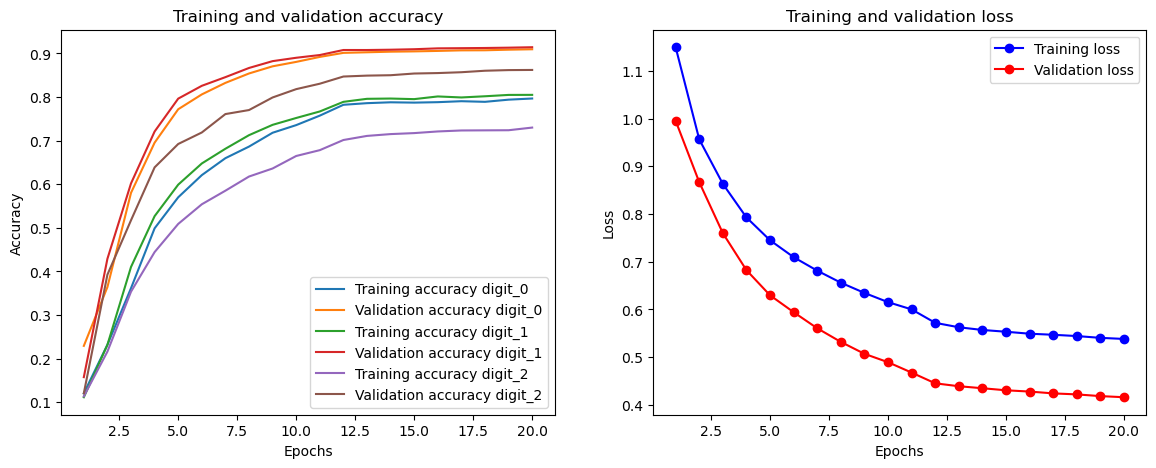

In [55]:
# Plot learning curves for the last fold
plot_learning_curves(history)

## Interpretation
The model is on the right track. Both training loss and validation loss decreasing over time, which is good, although the accuracy for digit 2 (purple lines) is lower than for digits 0 and 1.

### Training and Validation Accuracy
Although the training accuracy is slightly higher than the validation accuracy, the gap between them is not very large. That means the model is not overfitting.

### Training and validation Loss

The loss for both training and validation decreases significantly in the first few epochs and then stabilized, decreasing slowly.

##### The lowest loss using 'binary-crossentropy' as the loss function is around  is around 0.5, which is lower than loss using 'categorical-crossentropy' as the loss function.

### Next Plan: 
- Increase Model Complexity: Consider adding more layers or units to the model, especially to increase accuracy for digit 2 (purple lines).
- Hyperparameter Tuning: Experiment with different learning rates, batch sizes, and regularization techniques. Increase fold number. With more folds, the validation estimate is more robust and less variable and better Generalization.
- Using Batch Normalization to normalize the inputs to a layer for each mini-batch, to reduce the internal covariate shift.

The model is good, but requires further tuning and possibly a more complex architecture to improve its performance.


## **7C. Using Model with Softmax as Activation Function and binary_crossentropy as the activation function**

In [38]:
def create_cnn_model_smaxbc():
    inputs = Input(shape=(28, 28, 1))  # Input shape for a 28x28 grayscale image
    x = Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.001))(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    x = Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.001))(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    x = Flatten()(x)
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = Dropout(0.5)(x)
    outputs = [Dense(10, activation='softmax', name=f'digit_{i}')(x) for i in range(3)]
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(
        loss='binary_crossentropy',  # usually categorical_crossentropy is for multi-class classification, not for multi-label classification.
        optimizer='adam',
        metrics={f'digit_{i}': 'accuracy' for i in range(3)}
    )
    return model

# Example usage
model = create_cnn_model_smaxbc()
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 26, 26,    │        320 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 13, 13,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 13, 13,    │          0 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 11, 11,    │     18,496 │ dropout[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 5, 5, 64)  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 5, 5, 64)  │          0 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 1600)      │          0 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    409,856 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 256)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ digit_0 (Dense)     │ (None, 10)        │      2,570 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ digit_1 (Dense)     │ (None, 10)        │      2,570 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ digit_2 (Dense)     │ (None, 10)        │      2,570 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 436,382 (1.66 MB)

 Trainable params: 436,382 (1.66 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold = {key: y_train_dict[key][train_index] for key in y_train_dict}
    y_val_fold = {key: y_train_dict[key][val_index] for key in y_train_dict}

    model = create_cnn_model_smaxbc()  # Using CNN model with 'binary_crossentropy' function as the loss function

    history = model.fit(
        custom_data_generator(X_train_fold, y_train_fold, batch_size=128),
        epochs=20, verbose=1, steps_per_epoch=len(X_train_fold) // 128,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping, lr_scheduler, tensorboard_callback]    )

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 70ms/step - digit_0_accuracy: 0.1367 - digit_1_accuracy: 0.1359 - digit_2_accuracy: 0.1286 - loss: 2.8616 - val_digit_0_accuracy: 0.1027 - val_digit_1_accuracy: 0.0938 - val_digit_2_accuracy: 0.0930 - val_loss: 2.7829 - learning_rate: 0.0010
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - digit_0_accuracy: 0.5393 - digit_1_accuracy: 0.5333 - digit_2_accuracy: 0.5015 - loss: 1.0798 - val_digit_0_accuracy: 0.3619 - val_digit_1_accuracy: 0.3368 - val_digit_2_accuracy: 0.4577 - val_loss: 1.0653 - learning_rate: 0.0010
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - digit_0_accuracy: 0.8757 - digit_1_accuracy: 0.8761 - digit_2_accuracy: 0.8720 - loss: 0.4905 - val_digit_0_accuracy: 0.9036 - val_digit_1_accuracy: 0.9184 - val_digit_2_accuracy: 0.8978 - val_loss: 0.3827 - learning_rate: 0.0010
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - digit_0_accuracy: 0.9250 - digit_1_accuracy: 0.9200 - digit_2_accuracy: 0.9252 - loss:

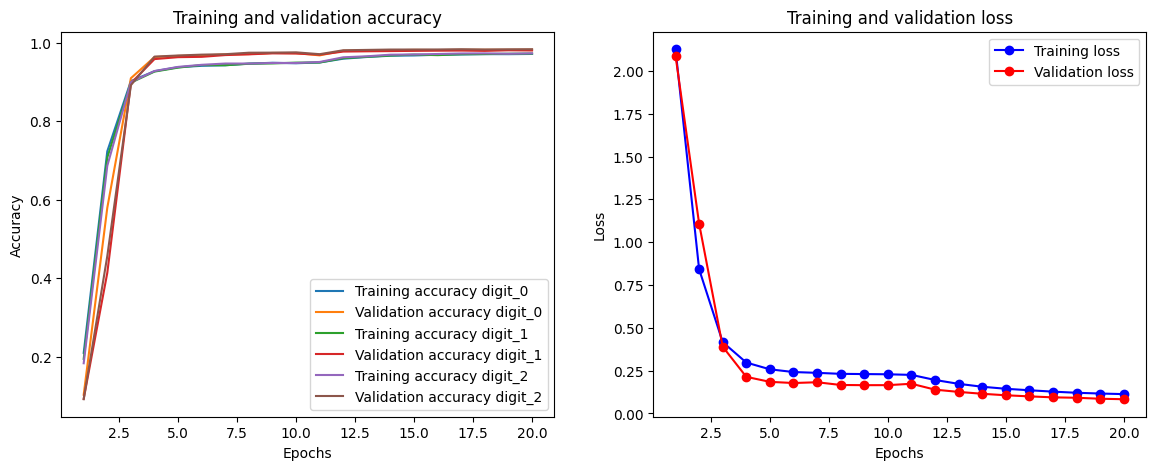

In [82]:
# Plot learning curves for the last fold
plot_learning_curves(history)

## **10. Hyperparameter Tuning**
- Perform hyperparameter tuning to identify the best model parameters.
- Apply regularization techniques to prevent overfitting.
- Use cross-validation to obtain a more reliable estimate of the model's performance. 
- Use batch Normalization to normalize the inputs to a layer for each mini-batch. This reduces the internal covariate shift.

In [44]:
# Adjust K-Fold Cross Validation = 5 folds
n = 5
kf = KFold(n_splits=n, shuffle=True)

In [40]:
# Reduce learning rate

def lr_schedule(epoch):
    lr = 1e-5  # Start with a smaller learning rate
    if epoch > 20:
        lr *= 0.01  # Further reduce by 10x after 20 epochs
    elif epoch > 10:
        lr *= 0.1  # Reduce by 10x after 10 epochs
    return lr

## Define the model with sigmoid and binary crossentropy and increased complexity

In [42]:
# Define the model with sigmoid and binary crossentropy and increased complexity

def create_cnn_model_sgbch():
    inputs = Input(shape=(28, 28, 1))  # Input shape for a 28x28 grayscale image
    x = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)

    x = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)

    x = Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)

    x = Flatten()(x)
    x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    outputs = [Dense(10, activation='sigmoid', name=f'digit_{i}')(x) for i in range(3)]
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(
        loss='binary_crossentropy',  # Binary_crossentropy for multi-label classification
        optimizer='adam',
        metrics={f'digit_{i}': 'accuracy' for i in range(3)}
    )
    return model

model = create_cnn_model_sgbch()
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 28, 28,    │        320 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        128 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 14, 14,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 14, 14,    │          0 │ max_pooling2d_5[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 14, 14,    │     18,496 │ dropout_7[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │        256 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 7, 7, 64)  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 7, 7, 64)  │          0 │ max_pooling2d_6[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 7, 7, 128) │     73,856 │ dropout_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 128) │        512 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 3, 3, 128) │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 3, 3, 128) │          0 │ max_pooling2d_7[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 1152)      │          0 │ dropout_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 512)       │    590,336 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512)       │      2,048 │ dense_2[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 512)       │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ digit_0 (Dense)     │ (None, 10)        │      5,130 │ dropout_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ digit_1 (Dense)     │ (None, 10)        │      5,130 │ dropout_10[0][0]

 Total params: 701,342 (2.68 MB)

 Trainable params: 699,870 (2.67 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [59]:
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold = {key: y_train_dict[key][train_index] for key in y_train_dict}
    y_val_fold = {key: y_train_dict[key][val_index] for key in y_train_dict}

    model = create_cnn_model_sgbch()  # Using CNN model with 'binary_crossentropy' function as the loss function

    history = model.fit(
        custom_data_generator(X_train_fold, y_train_fold, batch_size=32),
        epochs=20, verbose=1, steps_per_epoch=len(X_train_fold) // 32,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping, lr_scheduler, tensorboard_callback]    )

Epoch 1/20
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 122s 67ms/step - digit_0_accuracy: 0.3512 - digit_1_accuracy: 0.3345 - digit_2_accuracy: 0.3253 - loss: 1.7967 - val_digit_0_accuracy: 0.8761 - val_digit_1_accuracy: 0.8386 - val_digit_2_accuracy: 0.9235 - val_loss: 0.5015 - learning_rate: 0.0010
Epoch 2/20
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 111s 69ms/step - digit_0_accuracy: 0.9067 - digit_1_accuracy: 0.9084 - digit_2_accuracy: 0.9030 - loss: 0.3852 - val_digit_0_accuracy: 0.9388 - val_digit_1_accuracy: 0.9409 - val_digit_2_accuracy: 0.9423 - val_loss: 0.5471 - learning_rate: 0.0010
Epoch 3/20
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 106s 66ms/step - digit_0_accuracy: 0.9216 - digit_1_accuracy: 0.9202 - digit_2_accuracy: 0.9248 - loss: 0.3588 - val_digit_0_accuracy: 0.9613 - val_digit_1_accuracy: 0.9632 - val_digit_2_accuracy: 0.9648 - val_loss: 0.2633 - learning_rate: 0.0010
Epoch 4/20
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 105s 65ms/step - digit_0_accuracy: 0.9244 - digit_1_accuracy: 0.9241 - digit_2_accuracy: 0.

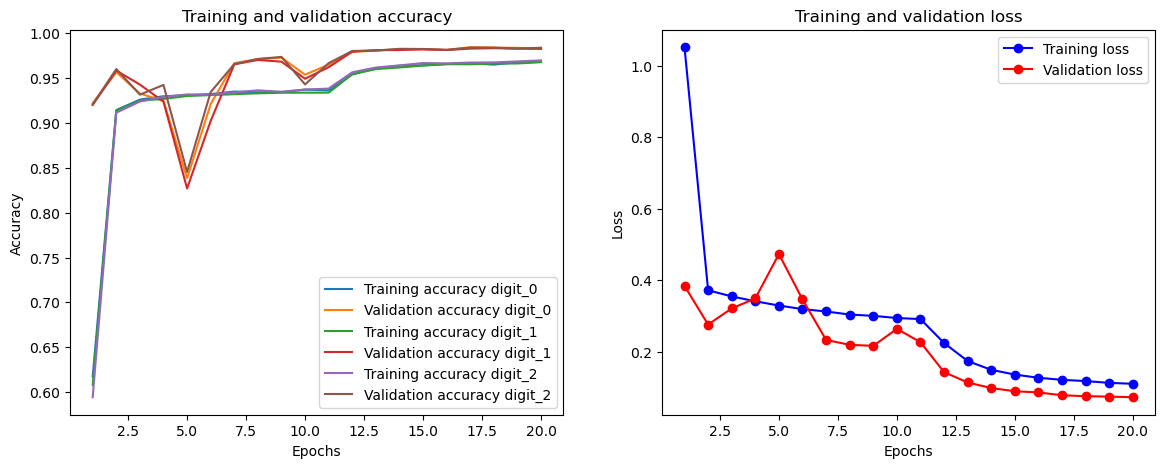

In [60]:
# Plot learning curves for the last fold
plot_learning_curves(history)

## Define the model with softmax and binary crossentropy and increased complexity

In [41]:
# Define the model with softmax and binary crossentropy and increased complexity

def create_cnn_model_smaxbch():
    inputs = Input(shape=(28, 28, 1))  # Input shape for a 28x28 grayscale image
    x = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)

    x = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)

    x = Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)

    x = Flatten()(x)
    x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    outputs = [Dense(10, activation='softmax', name=f'digit_{i}')(x) for i in range(3)]
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(
        loss='binary_crossentropy',  # Binary_crossentropy for multi-label classification
        optimizer='adam',
        metrics={f'digit_{i}': 'accuracy' for i in range(3)}
    )
    return model

model = create_cnn_model_smaxbch()
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 28, 28,    │        320 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 28, 28,    │        128 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 14, 14,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 14, 14,    │          0 │ max_pooling2d_2[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 14, 14,    │     18,496 │ dropout_3[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │        256 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 7, 7, 64)  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 7, 7, 64)  │          0 │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 7, 7, 128) │     73,856 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 128) │        512 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 3, 3, 128) │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 3, 3, 128) │          0 │ max_pooling2d_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 1152)      │          0 │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 512)       │    590,336 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512)       │      2,048 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 512)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ digit_0 (Dense)     │ (None, 10)        │      5,130 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ digit_1 (Dense)     │ (None, 10)        │      5,130 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 701,342 (2.68 MB)

 Trainable params: 699,870 (2.67 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [89]:
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold = {key: y_train_dict[key][train_index] for key in y_train_dict}
    y_val_fold = {key: y_train_dict[key][val_index] for key in y_train_dict}

    model = create_cnn_model_smaxbch()  # Using CNN model with 'binary_crossentropy' function as the loss function

    history = model.fit(
        custom_data_generator(X_train_fold, y_train_fold, batch_size=32),
        epochs=20, verbose=1, steps_per_epoch=len(X_train_fold) // 32,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping, lr_scheduler, tensorboard_callback]    )

Epoch 1/20
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 36s 20ms/step - digit_0_accuracy: 0.3765 - digit_1_accuracy: 0.3702 - digit_2_accuracy: 0.3527 - loss: 1.7583 - val_digit_0_accuracy: 0.9481 - val_digit_1_accuracy: 0.9417 - val_digit_2_accuracy: 0.9517 - val_loss: 0.3045 - learning_rate: 0.0010
Epoch 2/20
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - digit_0_accuracy: 0.9098 - digit_1_accuracy: 0.9065 - digit_2_accuracy: 0.9080 - loss: 0.3790 - val_digit_0_accuracy: 0.9484 - val_digit_1_accuracy: 0.9273 - val_digit_2_accuracy: 0.9453 - val_loss: 0.3053 - learning_rate: 0.0010
Epoch 3/20
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - digit_0_accuracy: 0.9224 - digit_1_accuracy: 0.9226 - digit_2_accuracy: 0.9204 - loss: 0.3555 - val_digit_0_accuracy: 0.9313 - val_digit_1_accuracy: 0.9234 - val_digit_2_accuracy: 0.9556 - val_loss: 0.3145 - learning_rate: 0.0010
Epoch 4/20
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - digit_0_accuracy: 0.9305 - digit_1_accuracy: 0.9274 - digit_2_accuracy: 0.9291

## **11. Re-Evaluate The Model**
Re-Evaluate The Model after Hyperparameter Tuning

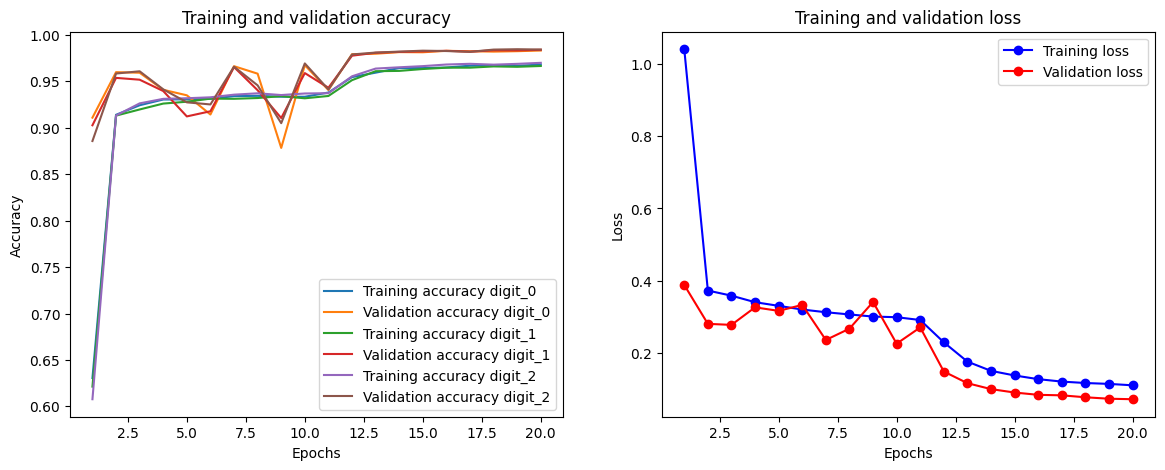

In [90]:
# Plot learning curves for the last fold
plot_learning_curves(history)

In [40]:
''''%reload_ext tensorboard
%tensorboard --logdir logs/fit'''

"'%reload_ext tensorboard\n%tensorboard --logdir logs/fit"

## Interpretation

-There are some fluctuations in the early epochs, but overall, the training and validation accuracies are close to each other. The model is showing improvement and better performance after hyperparameter tuning. The tuning made the model way better. Both training and validation accuracies are higher, and losses are lower.

### Training and Validation Accuracy
- The training accuracy has gotten better and keeps going up more than 96%. It means the model is learning more about the digits.
- The validation accuracy is also getting better and follows the training accuracy closely. This means the model isn’t just memorizing the training data but is also good at predicting new data. The validation accuracy goes up to about the same level as the training accuracy, which is great because it shows there’s no overfitting.

### Training and validation Loss
The training loss keeps going down, showing the model is making fewer mistakes on the training data.
There’s a drop around epoch 2-3. After that, the loss keeps going down but a bit slower.
The validation loss is also going down and matches the training loss trend. This means the model is doing better on new data too.
The validation loss is close to the training loss, which is good, because it means the model is not overfitting.

##### The lowest loss using 'binary-crossentropy' as the loss function is around  is around 0.1, which is lower than loss using 'categorical-crossentropy' as the loss function.

## **12B. Final evaluation on the Test set with with Sigmoid activation function and 'binary_crossentropy as the loss function**
After finishing all the training and testing on the validation data, we trained the model one last time on all the training data. Then, we tested it on a completely new set of data that the model had never seen before (the Test set). This final evaluation checks how well the model performs on totally new data, making sure it’s ready for real life.

In [62]:
# Final evaluation on the test set Using CNN model with Sigmoid activation function and binary crossentropy
model = create_cnn_model_sgbch()   

history = model.fit(
        custom_data_generator(X_train_fold, y_train_fold, batch_size=32),
        epochs=20, verbose=1, steps_per_epoch=len(X_train_fold) // 32,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping, lr_scheduler, tensorboard_callback]    )

# Evaluate the model on the test set
test_metrics = model.evaluate(X_test, y_test_dict)
test_loss = test_metrics[0]
test_accuracy = test_metrics[1:]

print(f'Test loss: {test_loss}')
for i, acc in enumerate(test_accuracy):
    print(f'Test accuracy for digit_{i}: {acc}')

Epoch 1/20
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 140s 78ms/step - digit_0_accuracy: 0.3693 - digit_1_accuracy: 0.3571 - digit_2_accuracy: 0.3425 - loss: 1.7698 - val_digit_0_accuracy: 0.9274 - val_digit_1_accuracy: 0.8953 - val_digit_2_accuracy: 0.9124 - val_loss: 0.3659 - learning_rate: 0.0010
Epoch 2/20
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 128s 80ms/step - digit_0_accuracy: 0.9053 - digit_1_accuracy: 0.9051 - digit_2_accuracy: 0.9077 - loss: 0.3820 - val_digit_0_accuracy: 0.8729 - val_digit_1_accuracy: 0.7945 - val_digit_2_accuracy: 0.8488 - val_loss: 0.4734 - learning_rate: 0.0010
Epoch 3/20
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 129s 81ms/step - digit_0_accuracy: 0.9255 - digit_1_accuracy: 0.9177 - digit_2_accuracy: 0.9237 - loss: 0.3558 - val_digit_0_accuracy: 0.9652 - val_digit_1_accuracy: 0.9630 - val_digit_2_accuracy: 0.9664 - val_loss: 0.2623 - learning_rate: 0.0010
Epoch 4/20
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 130s 81ms/step - digit_0_accuracy: 0.9273 - digit_1_accuracy: 0.9258 - digit_2_accuracy: 0.

## Interpretation:

There is high accuracy on the test set which the model has never seen before, that means the model can predict on the new unseen data. The model regularized well and trained appropriately, no overfitting nor underfitting.

## **12C. Final evaluation on the Test set with Softmax activation function and 'binary_crossentropy' function as the loss function**
After finishing all the training and testing on the validation data, we trained the model one last time on all the training data. Then, we tested it on a completely new set of data that the model had never seen before (the Test set). This final evaluation checks how well the model performs on totally new data, making sure it’s ready for real life.

In [45]:
# Final evaluation on the test set Using CNN model with Softmax activation function and binary crossentropy
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold = {key: y_train_dict[key][train_index] for key in y_train_dict}
    y_val_fold = {key: y_train_dict[key][val_index] for key in y_train_dict}

model = create_cnn_model_smaxbch()   

history = model.fit(
        custom_data_generator(X_train_fold, y_train_fold, batch_size=32),
        epochs=20, verbose=1, steps_per_epoch=len(X_train_fold) // 32,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping, lr_scheduler, tensorboard_callback]    )

# Evaluate the model on the test set
test_metrics = model.evaluate(X_test, y_test_dict)
test_loss = test_metrics[0]
test_accuracy = test_metrics[1:]

print(f'Test loss: {test_loss}')
for i, acc in enumerate(test_accuracy):
    print(f'Test accuracy for digit_{i}: {acc}')

Epoch 1/20
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 36s 20ms/step - digit_0_accuracy: 0.3678 - digit_1_accuracy: 0.3639 - digit_2_accuracy: 0.3508 - loss: 1.7715 - val_digit_0_accuracy: 0.9444 - val_digit_1_accuracy: 0.9457 - val_digit_2_accuracy: 0.9279 - val_loss: 0.3730 - learning_rate: 0.0010
Epoch 2/20
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - digit_0_accuracy: 0.9067 - digit_1_accuracy: 0.9001 - digit_2_accuracy: 0.9028 - loss: 0.3896 - val_digit_0_accuracy: 0.9643 - val_digit_1_accuracy: 0.9547 - val_digit_2_accuracy: 0.9661 - val_loss: 0.2737 - learning_rate: 0.0010
Epoch 3/20
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - digit_0_accuracy: 0.9227 - digit_1_accuracy: 0.9198 - digit_2_accuracy: 0.9239 - loss: 0.3576 - val_digit_0_accuracy: 0.9016 - val_digit_1_accuracy: 0.8672 - val_digit_2_accuracy: 0.9180 - val_loss: 0.4875 - learning_rate: 0.0010
Epoch 4/20
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - digit_0_accuracy: 0.9248 - digit_1_accuracy: 0.9246 - digit_2_accuracy: 0.9277

## Interpretation:

The model achieves the ***highest accuracy on the test set*** when using the ***Softmax activation function and binary crossentropy for the loss function***, as opposed to using the sigmoid activation function with the same loss function.